In [5]:
# Install Tensorflow Version 2.0 Locally 
!pip3 install tensorflow==2.0.0-beta0

In [6]:
# Check the tensorflow version 
import tensorflow as tf
print ("tensorflow version: ", tf.__version__)

tensorflow version:  1.15.0


#### Dataset: [Sarcasm Dataset](https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection); Task: Find Whether a News Headline is Sarcastic or Not <br>

News Headlines collected from The Onion which aims at producing sarcastic version of current news events. The real headlines are collected from the HuffPost. The file format is *json* and each record consist of 3 attributes. <br>
* _is_sarcastic_:1, if the record is sarcastic.
* _headline_: The headline of the news article.
* _article_link_: Link of the original news article   

In [0]:
# Mount the Drive 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Reading from the JSON File 
# Divide the data into train and test set
import json
import pandas as pd

sarcasm_data_path = '/content/gdrive/My Drive/Colab Notebooks/NLP_Week3/sarcasm.json'

data = []
# with open(sarcasm_data_path) as sf:
  # sarcasm_data = json.load(sf)
  # for line in sf:
    # data.append(json.loads(line))


df = pd.read_json(sarcasm_data_path, lines = True)


df = df.drop(['article_link'], axis=1)

print (df.head(3))
headlines_list = df['headline'].tolist()
is_sarcastic = df['is_sarcastic'].tolist() 

# print ("sarcasm_data type : ", type(data))

 
print ("check example headline: ", headlines_list[102])
print ("check corresponding label: ", is_sarcastic[102])

print ("check the number of samples: ", len(headlines_list)) 


from sklearn.model_selection import train_test_split

train_sent, test_sent, train_lab, test_lab = train_test_split(headlines_list, is_sarcastic, test_size=0.20, stratify=is_sarcastic, random_state=20)

print ("length of training data: ", len(train_sent))
print ("length of test data: ", len(test_sent))


   is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep. totally nails why congress is falling...
2             0  eat your veggies: 9 deliciously different recipes
check example headline:  after decades of effort, chemists overseas report 'nano' breakthrough
check corresponding label:  0
check the number of samples:  28619
length of training data:  22895
length of test data:  5724


#### Working Towards the Model

In [0]:
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2001
oov_token = "UNK"
embed_dim = 16
trunc_type = 'post'
pad_type = 'post'
max_length = 100



tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sent)
word_index = tokenizer.word_index


training_seq = tokenizer.texts_to_sequences(train_sent)
training_pad = pad_sequences(training_seq, maxlen = max_length, padding = pad_type, truncating = trunc_type)

testing_seq = tokenizer.texts_to_sequences(test_sent)
testing_pad = pad_sequences(testing_seq, maxlen=max_length, padding=pad_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 30
history = model.fit(training_pad, train_lab, epochs=num_epochs, validation_data=(testing_pad, test_lab), verbose=2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           32016     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 46,145
Trainable params: 46,145
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 22895 samples, validate on 5724 samples
Epoch 1/30
22895/22895 - 53s - loss: 0.4235 - accuracy: 0.7859 - val_loss: 0.3482 - val_accuracy: 0.8438
Ep

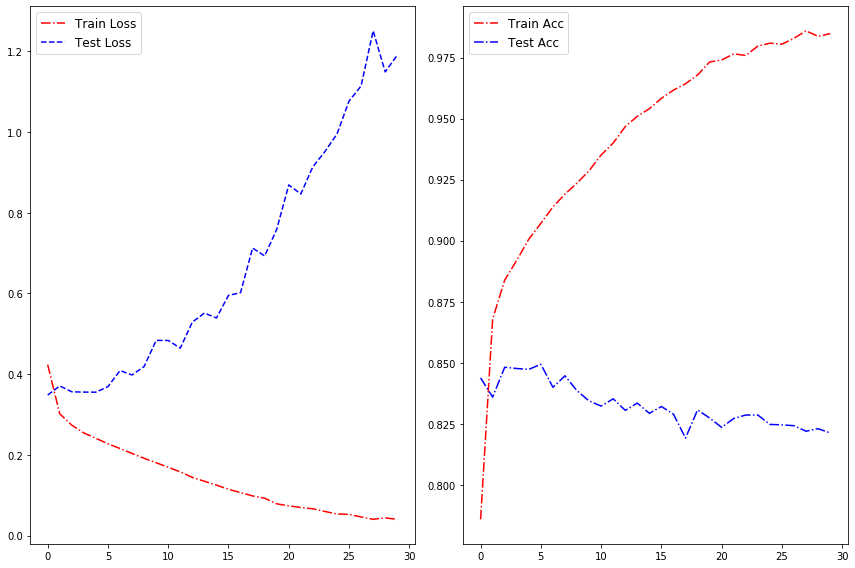

In [0]:
### check the loss and accuracy

import matplotlib.pyplot as plt

train_loss = history.history['loss']
test_loss = history.history['val_loss']

test_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

steps = range(len(train_loss))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(steps, train_loss, linestyle='-.', color='red', label='Train Loss')
plt.plot(steps, test_loss, linestyle='--', color='blue', label='Test Loss')
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(steps, train_acc, linestyle='-.', color='red', label='Train Acc')
plt.plot(steps, test_acc, linestyle='-.', color='blue', label='Test Acc')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()